# **Predictive Analysis Project: Regresi untuk Memprediksi Skor Kecanduan Media Sosial pada Dataset Students Social Media Addiction**
- **Nama: Diva Anggreini Harahap**
- **Email: divaanggreiniharahap@gmail.com**
- **ID Dicoding: divaaharahap / MC319D5X2329**

## **About Dataset**
- Dataset didapat dari Kaggle.
- Link : https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships
- Berisi perilaku media ssial siswa dan hasil terkait dalam kehidupan mereka. Dataset ini mencakup beberapa negara dan tingkatan akademik, dengan fokus pada dimensi utama seperti intensitas penggunaan, preferensi platform dan dinamika hubungan. Setiap baris merepresentasikan jawaban satu siswa dalam survei, memberikan gambaran potong lintang yang cocok untuk analisis statistik.
- Penjelasan Kolom :
- Student ID : Identifier unik responden
- Age : Usia (tahun)
- Gender : Jenis kelamin
- Academic_Level : Tingkatan pendidikan
- Country : Negara tempat tinggal
- Avg_Daily_Usage_Hours : Rata-rata jam penggunaan media sosial per hari
- Most_Used_Platform : Platform yang paling sering digunakan
- Affects_Academic_Performance : Dampak yang dilaporkan pada akademik
- Sleep_Hours_Per_Night : Rata-rata jam tidur per malam
- Mental_Health_Score : Penilaian diri terhadap kesehatan mental
- Relationship_Status : status hubungan
- Conflicts_Over_Social_Media : jumlah konflik hubungan akibat media sosial
- Addicted_Score : skor kecanduan media sosial

## **Data Preparation**

In [1]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

Sebagai langkah awal dari project ini, kita akan memuat dan mengecek data awal untuk melihat apakah data sudah terbaca dengan benar, jenis data kolom, dan apakah ada nilai yang aneh

In [2]:
# Load data dari file csv
df = pd.read_csv("Students Social Media Addiction.csv")
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
# Cek Missing values
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Berdasarkan output diatas, bisa kita simpulkan bahwa dataset yang kita gunakan sudah bersih dari nilai kosong (missing_values). Dengan demikian, tidak perlukan langkah tambahan untuk menangani missing values, sehingga data siap untuk proses selanjutnya.

In [5]:
# Cek duplikat
df.duplicated().sum()

0

Dataset juga sudah bersih dari data duplikat. Artinya setiap baris data unik dan tidak ada pengulangan yang dapat memengaruhi analisis atau hasil model

In [6]:
# Cek tipe data
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

Pembagian tipe data setiap kelas <br>
Numerik :
- Student_ID
- Age
- Avg_Daily_Usage_Hours
- Sleep_Hours_Per_Night
- Mental_Health_Score
- Conflicts_Over_Social_Media
- Addicted_Score

Kategorikal (Object):
- Gender
- Academic_Level
- Country
- Most_Used_Platform
- Affects_Academic_Performance
- Relationship_Status


In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


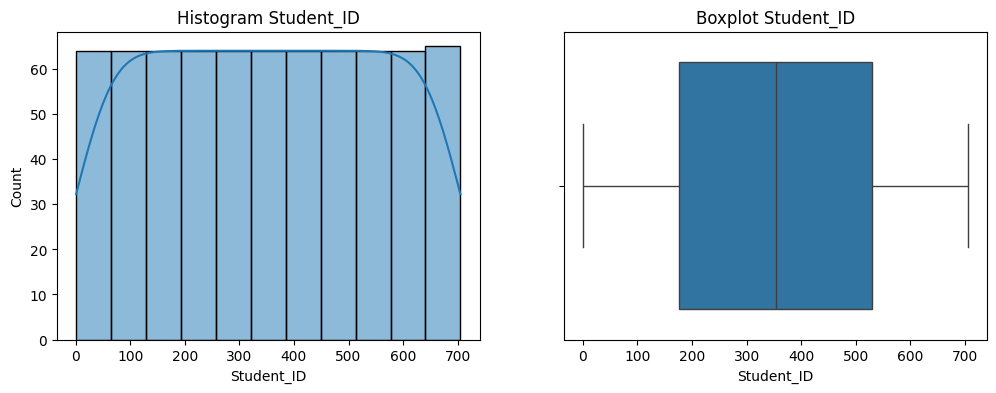

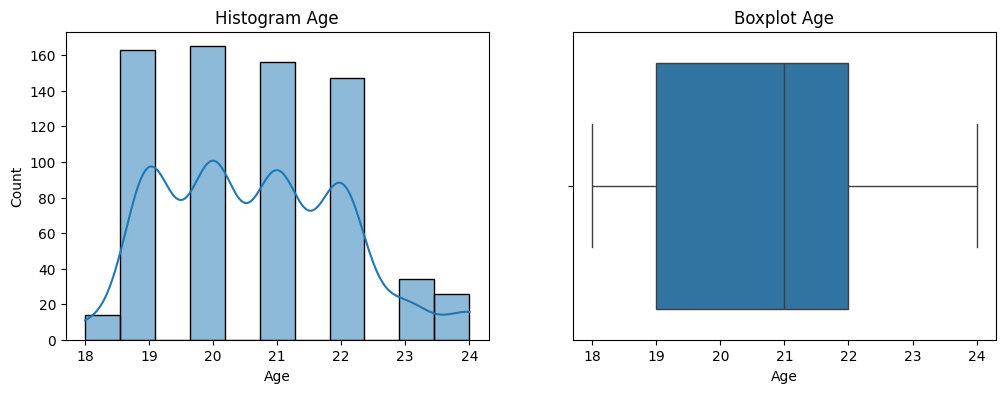

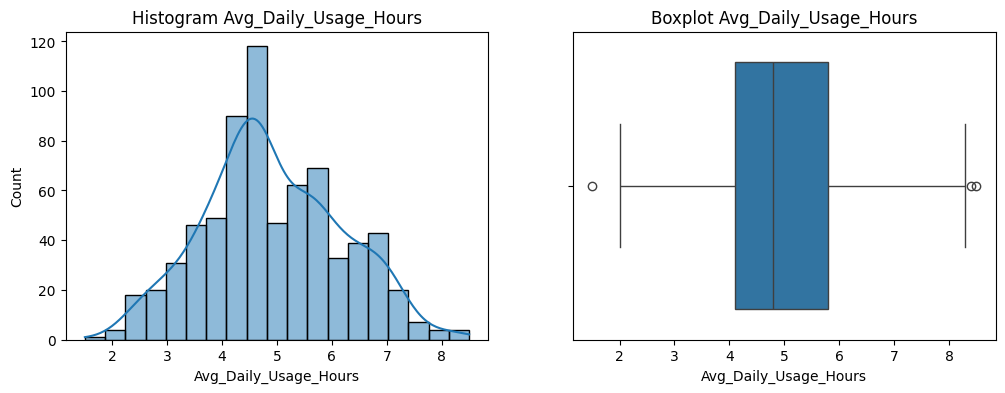

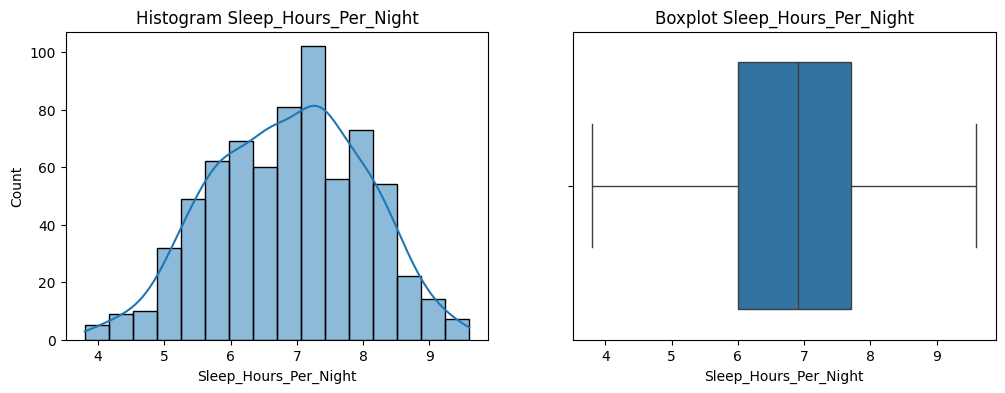

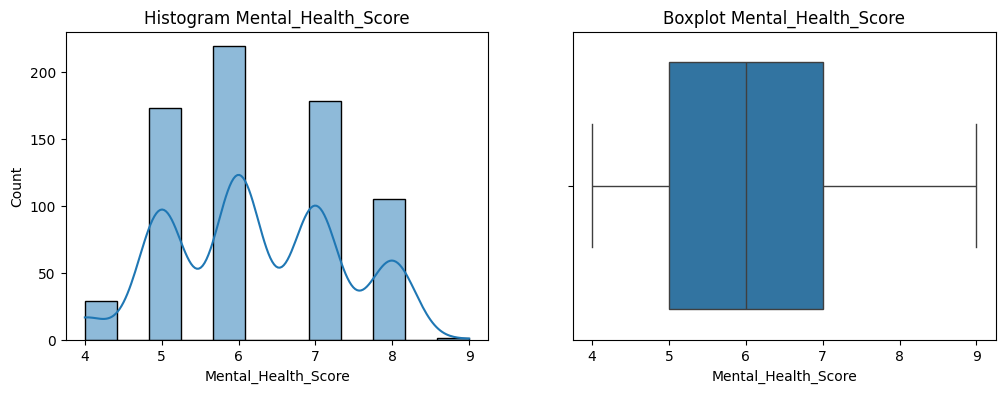

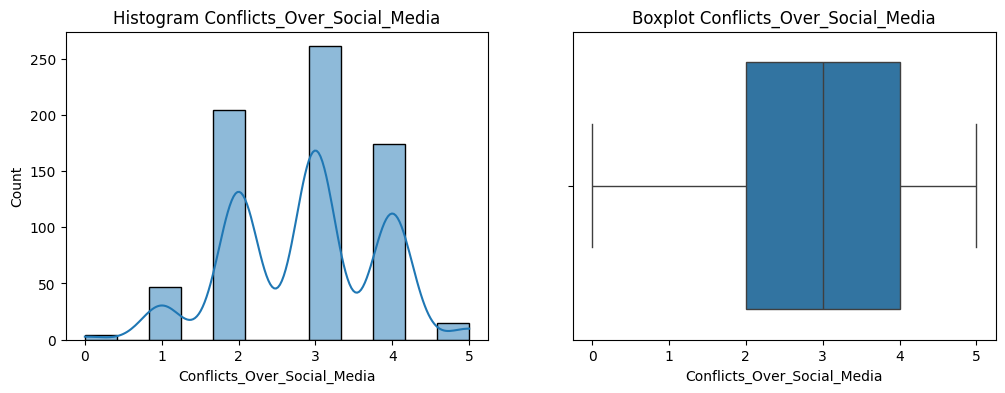

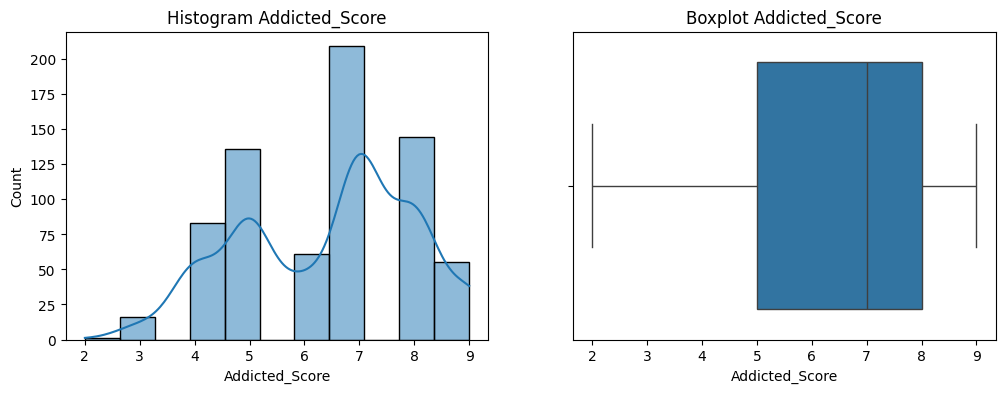

In [8]:
# Visualisasi numerical_cols dengan histogram
# Deteksi Outliers dengan Boxplot

numerical_cols = ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

for col in numerical_cols:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    
    plt.show()

**Insights:**
- Histogram menunjukkan distribusi yang sedikit condong ke kanan (skewness kecil), dengan puncak frekuensi berada di skor 7 dan terdapat variasi nilai yang cukup baik, tidak terlalu terkonsentrasi pada satu nilai.
- Boxplot menunjukkan tidak ada outlier yang signifikan pada Addicted_Score. Rentang nilainya juga berada berkisar antara sekitar 2 hingga 9. Kuartil bawah dan atas menunjukkan penyebaran data yang cukup merata. Sehingga kita tidak perlu melakukan penanganan outlier.

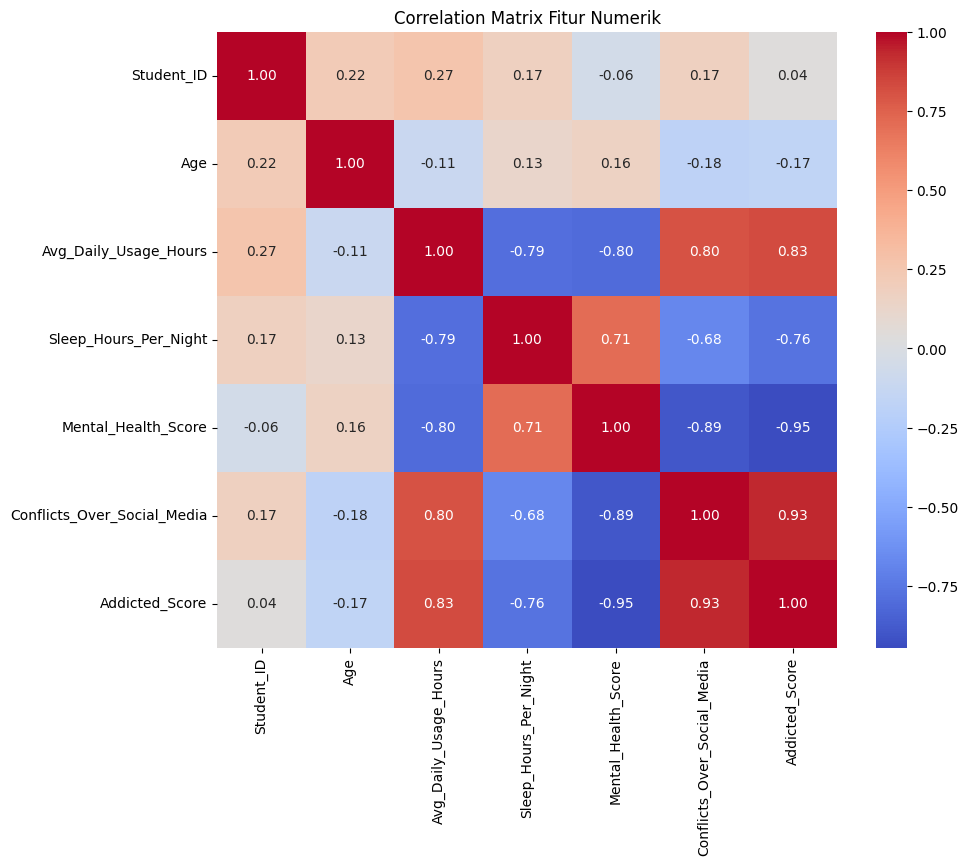

In [9]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Fitur Numerik')
plt.show()

- `Addicted_Score` memiliki korelasi positif yang sangat kuat dengan `Avg_Daily_Usage_Hours` (0.83) dan `Conflicts_Over_Social_Media` (0.93).

- `Addicted_Score` memiliki korelasi negatif yang sangat kuat dengan `Mental_Health_Score` (-0.95) dan `Sleep_Hours_Per_Night` (-0.76).

**Interpretasi**
- Semakin tinggi durasi penggunaan media sosial, maka akan semakin tinggi pula skor kecanduannya.
- Semakin sering konflik yang terjadi akibat penggunaan media sosial, semakin tinggi juga skor kecanduannya.
- Skor kesehatan mental yang baik berkorelasi dengan skor kecanduan yang lebih rendah, ini menunjukkan bahwa kecanduan media sosial berdampak negatif terhadap kesehatan mental.
- Jam tidur per malam yang lebih sedikit berkorelasi dengan skor kecanduan yang lebih tinggi, mengindikasikan kecanduan media sosial juga mengganggu pola tidur.

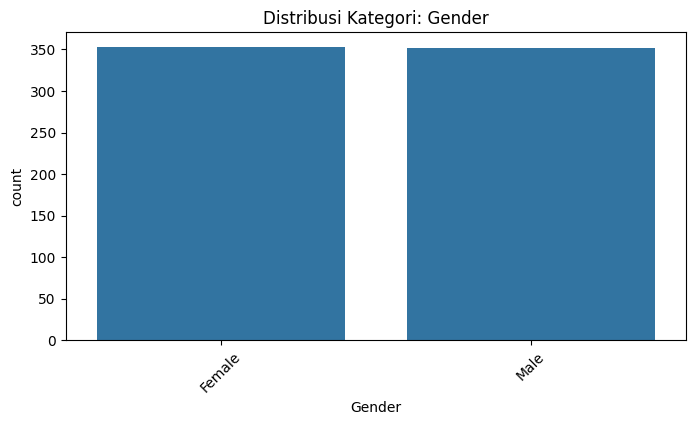

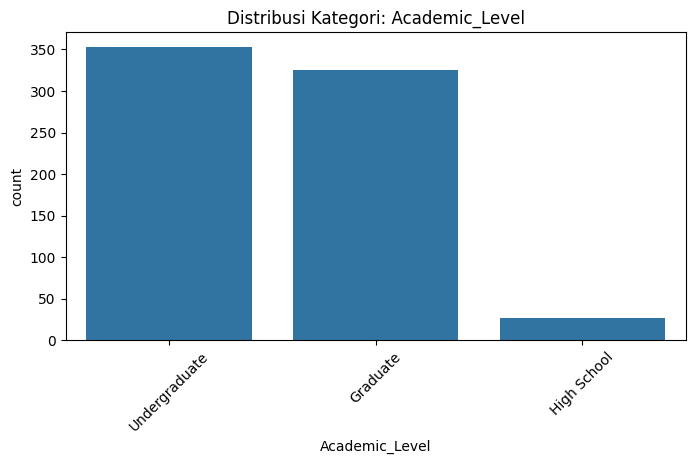

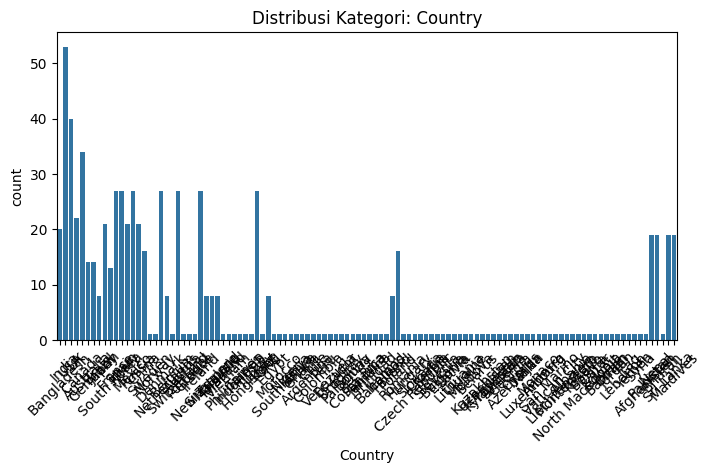

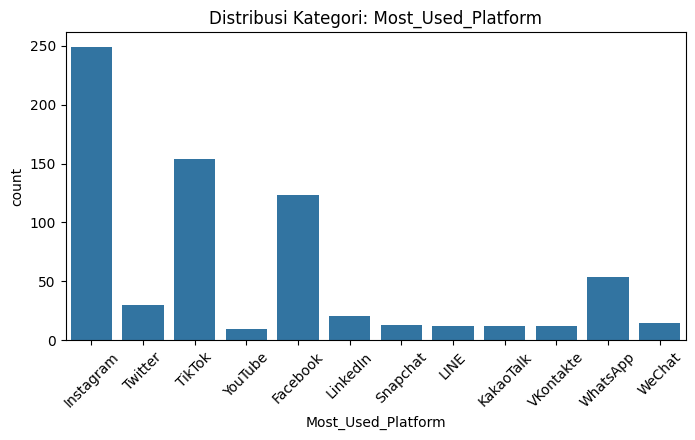

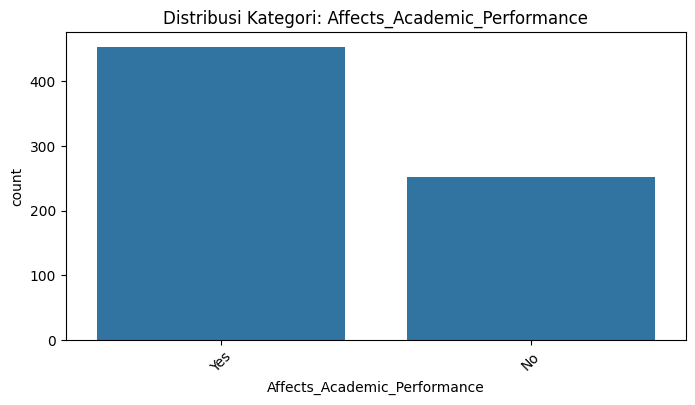

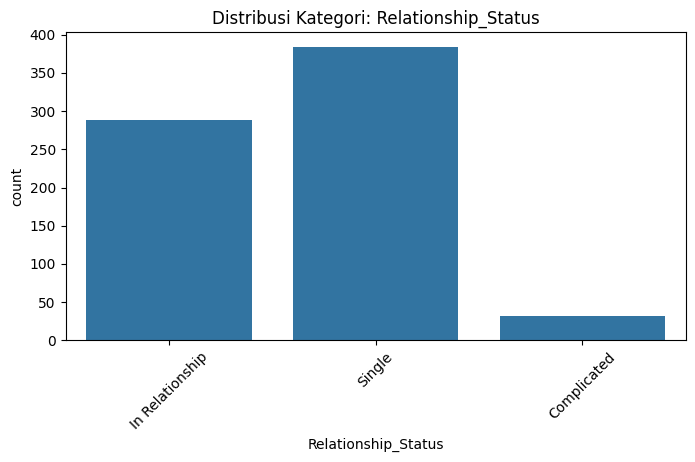

In [10]:
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.show()

**Insight**
- Responden terdiri dari jumlah laki-laki dan perempuan yang seimbang, mayoritas berstatus mahasiswa sarjana.
- Mereka berasal dari berbagai negara dengan distribusi yang tidak merata, dan Instagram adalah platform media sosial yang paling populer.
- Sebagian besar mengakui bahwa media sosial memengaruhi prestasi akademik mereka.
- Mayoritas responden berstatus lajang.

In [11]:
df = df.drop(columns=['Age', 'Student_ID', 'Gender', 'Country'])

Kita akan menghapus kolom `Age`, `Student_ID`, `Gender`, `Country` karena kurang relevan dan tidak memberikan kontribusi yang signifikan terhadap tujuan penelitian kita. Penghapusan kolom-kolom ini bisa membantu kita untuk fokus pada fitur-fitur yang relevan dan informatif terkait perilaku penggunaan sosial media dan faktor-faktor yang memengaruhi kecanduan.

In [12]:
df.head(5)

,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## **Data Preprocessing**

### Label Encoding untuk kolom kategori

In [13]:
kategori = ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']
for kol in kategori:
    le = LabelEncoder()
    df[kol] = le.fit_transform(df[kol])
    print(f"Kelas pada {kol}: {le.classes_}")

Kelas pada Academic_Level: ['Graduate' 'High School' 'Undergraduate']
Kelas pada Most_Used_Platform: ['Facebook' 'Instagram' 'KakaoTalk' 'LINE' 'LinkedIn' 'Snapchat' 'TikTok'
 'Twitter' 'VKontakte' 'WeChat' 'WhatsApp' 'YouTube']
Kelas pada Relationship_Status: ['Complicated' 'In Relationship' 'Single']
Kelas pada Affects_Academic_Performance: ['No' 'Yes']


In [14]:
# cek encoding kolom kategori
print(df['Academic_Level'].unique())
print(df['Most_Used_Platform'].unique())

[2 0 1]
[ 1  7  6 11  0  4  5  3  2  8 10  9]


In [15]:
# liat tipe data untuk kolom kategori
print(df['Academic_Level'].dtype)

int32


### Handling Missing Values

Karena setelah kita cek di data preparation bahwa dataset kita tidak memiliki missing values, oleh karena itu kita tidak perlu melakukan penanganan missing values.

### Scaling (Normalisasi Fitur Numerik)

Disini kita akan melakukan normalisasi untuk mengubah nilai-nilai fitur numerik supaya berada dalam rentang atau skala tertentu agar semua fitur punya bobot yang seimbang saat diproses oleh algoritma.

Kita menggunakan StandardScaler yang memiliki mean = 0 dan standard deviation (simpangan beku) = 1, jadi nilai fitur akan tersebar sekitar nol, sehingga semua fitur berada pada skala yang sama. Ini mencegah fitur dengan skala besar mendominasi proses pelatihan model.

In [16]:
numerik = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

scaler = StandardScaler()
df[numerik] = scaler.fit_transform(df[numerik])

print(df[numerik].describe().round(2))

       Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
count                 705.00                 705.00               705.00   
mean                    0.00                  -0.00                -0.00   
std                     1.00                   1.00                 1.00   
min                    -2.72                  -2.73                -2.02   
25%                    -0.65                  -0.77                -1.11   
50%                    -0.09                   0.03                -0.21   
75%                     0.70                   0.74                 0.70   
max                     2.85                   2.43                 2.51   

       Conflicts_Over_Social_Media  Addicted_Score  
count                       705.00          705.00  
mean                          0.00           -0.00  
std                           1.00            1.00  
min                          -2.98           -2.80  
25%                          -0.89           -0.91

In [17]:
# cek scaling
print(df[numerik].mean())
print(df[numerik].std())

Avg_Daily_Usage_Hours          1.612579e-16
Sleep_Hours_Per_Night         -2.922800e-16
Mental_Health_Score           -3.073979e-16
Conflicts_Over_Social_Media    0.000000e+00
Addicted_Score                -1.209434e-16
dtype: float64
Avg_Daily_Usage_Hours          1.00071
Sleep_Hours_Per_Night          1.00071
Mental_Health_Score            1.00071
Conflicts_Over_Social_Media    1.00071
Addicted_Score                 1.00071
dtype: float64


Nah, berdasarkan output diatas menunjukkan bahwa proses standarisasi berhasil, karena rata-rata (mean) setiap fitur mendekati 0 dan std nya jadi 1.

### Split Dataset Train-Test

Kita akan membagi dataset menjadi dua bagian :
- Data training : untuk melatih model, agar model mempelajari pola dan hubungan natara fitur dan target.
- Data testing : untuk menguji performa model setelah dilatih, guna menilai kemampuan model dalam memprediksi data baru yang belum pernah dilihat sebelumnya.

Disini kita akan membaginya dengan proporsi 80% untuk data training dan 20% untuk data testing.

In [18]:
# Pisahkan fitur dan target
X = df.drop(columns=['Addicted_Score'])
y = df['Addicted_Score']

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")

Data training: (564, 8), Data testing: (141, 8)


In [19]:
# cek apakah ada overlap baris (tidak ada data training di testing)
print(set(X_train.index) & set(X_test.index)) 

set()


Berarti tidak ada irisan (overlap) antara indeks data training dan data testing. Artinya, data training dan testing benar-benar terpisah, tidak ada data yang sama muncul di keduanya.

## **Modelling**

### Inisiasi Model

Kita mempersiapkan dua model regresi yang berbeda, satu model kompleks (Random Forest) dan satu model sederhana (Linear Regression) untuk dibandingkan performanya.

In [20]:
# Inisialisasi dua model regresi
rf_model = RandomForestRegressor(random_state=42)  
knn_model = KNeighborsRegressor(n_neighbors=5)

### Melatih model dengan Data Training

In [21]:
# Latih model KNN Regressor
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [22]:
# Latih model Random Forest
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Pada tahap ini, kedua model belajar pola hubungan antara fitur (X_train) dan target (Y_train) berdasarkan data training.

## **Evaluasi dan Inference**

In [23]:
# Prediksi target menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Prediksi target menggunakan Linear Regression
y_pred_knn = knn_model.predict(X_test)

In [24]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)      
    rmse = np.sqrt(mse)                           
    mae = mean_absolute_error(y_true, y_pred)    
    r2 = r2_score(y_true, y_pred)                 
    print(f"Evaluasi Model: {model_name}")
    print(f"RMSE: {rmse:.3f}")                     
    print(f"MAE: {mae:.3f}")                       
    print(f"R2 Score: {r2:.3f}\n")                 

# Evaluasi model Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Evaluasi model Linear Regression
evaluate_model(y_test, y_pred_knn, "KNN Regressor")

Evaluasi Model: Random Forest Regressor
RMSE: 0.148
MAE: 0.058
R2 Score: 0.978

Evaluasi Model: KNN Regressor
RMSE: 0.158
MAE: 0.059
R2 Score: 0.975



**Random Forest Regressor**
- RMSE : 0.147, rata-rata kesalahan prediksi relatif kecil, menunjukkan prediksi sangat dekat dengan nilai aktual.
- MAE : 0.058, rata-rata selisih absolut juga kecil, menandakan prediksi cukup akurat.
- R2 Score : 0.978, model mampu menjelaskan 97.8% variansi data, artinya sangat baik.

**KNN Regression**
- RMSE: 0.158 — sedikit lebih besar dari Random Forest.
- MAE: 0.059 — hampir sama dengan Random Forest.
- R2 Score: 0.975 — menjelaskan 97.5% variansi data, sangat kompetitif.

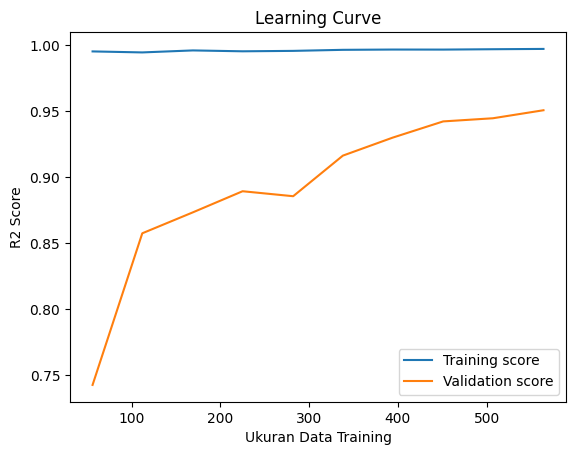

In [25]:
# cek overfitting (Random Forest) dengan Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Ukuran Data Training')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

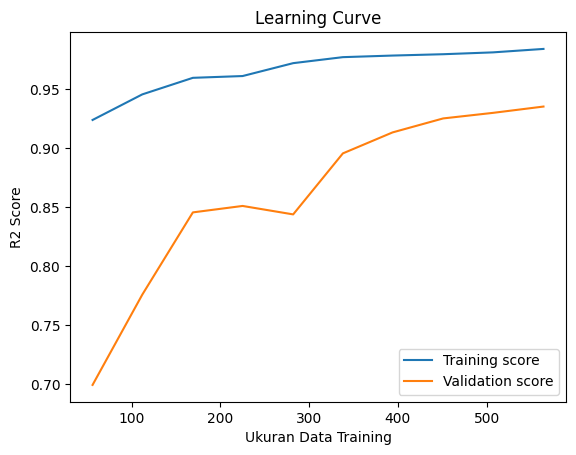

In [26]:
# cek overfitting (KNN Regression) dengan Learning Curve
train_sizes, train_scores, test_scores = learning_curve(knn_model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Ukuran Data Training')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

## **Cross-Validation**

In [27]:
# Cross-validation Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest CV R2 Scores:", cv_scores_rf)
print("Random Forest CV R2 Mean:", np.mean(cv_scores_rf))

# Cross-validation KNN Regression
cv_scores_lr = cross_val_score(knn_model, X, y, cv=5, scoring='r2')
print("KNN Regressor CV R2 Scores:", cv_scores_lr)
print("KNN Regressor CV R2 Mean:", np.mean(cv_scores_lr))

Random Forest CV R2 Scores: [0.92057037 0.9099883  0.97422358 0.98443217 0.96434614]
Random Forest CV R2 Mean: 0.9507121114426553
KNN Regressor CV R2 Scores: [0.88640646 0.93748967 0.97735317 0.96639131 0.90748143]
KNN Regressor CV R2 Mean: 0.9350244083349903


#### **Interpretasi Cross-Validation R2 Scores** <br>
**Random Forest Regressor** <br>
R2 Score tiap fold bervariasi antara sekitar 0.91 hingga 0.98

Rata-rata R2 Score 0.9515 (95.15%), menunjukkan model ini sangat konsisten dan akurat dalam menjelaskan variansi data.

**KNN Regressor** <br>
R2 Score tiap fold antara 0.89 hingga 0.98

Rata-rata R2 Score 0.9350 (93.50%), juga sangat baik dan stabil, tapi sedikit lebih rendah dibanding Random Forest.



## **Visualisasi Hasil**

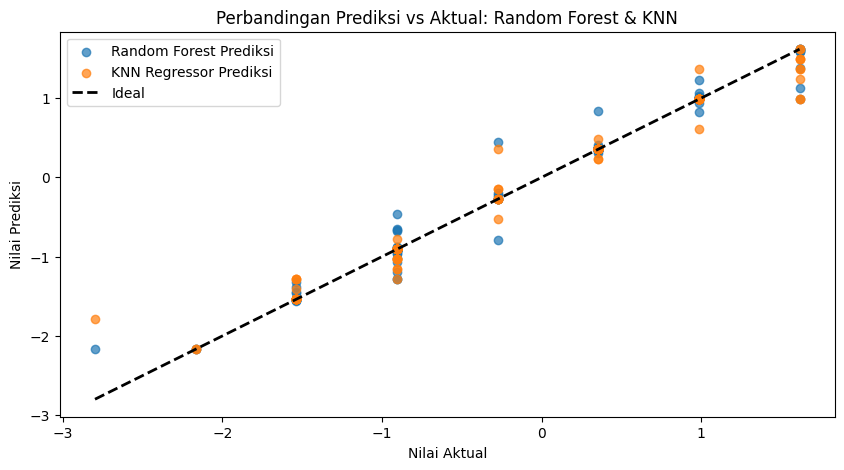

In [28]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred_rf, label='Random Forest Prediksi', alpha=0.7)
plt.scatter(y_test, y_pred_knn, label='KNN Regressor Prediksi', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Prediksi vs Aktual: Random Forest & KNN')
plt.legend()
plt.show()

- Random Forest dan KNN Regressor sebagian besar berada dekat garis ideal, menunjukkan performa prediksi yang cukup baik dari keduanya. Namun, Random Forest lebih konsisten mendekati garis ideal, terutama pada nilai ekstrem, menunjukkan akurasi yang lebih tinggi.

- KNN menunjukkan penyebaran error yang lebih besar di nilai ekstrem dan cenderung menghasilkan prediksi yang lebih “rata” (regresi ke mean).

- Random Forest lebih mampu menangkap pola kompleks, sementara KNN kurang efektif saat data bervariasi tajam atau mengandung outlier.

**Kesimpulan** <br>
Random Forest memberikan prediksi yang lebih akurat dan stabil dibandingkan KNN Regressor, terutama pada data dengan pola non-linear atau nilai ekstrem.
Namun, KNN tetap memberikan performa yang cukup baik pada bagian tengah distribusi data.

Feature importance Random Forest:
Mental_Health_Score: 0.8401
Conflicts_Over_Social_Media: 0.1084
Most_Used_Platform: 0.0139
Sleep_Hours_Per_Night: 0.0127
Avg_Daily_Usage_Hours: 0.0126
Affects_Academic_Performance: 0.0060
Academic_Level: 0.0039
Relationship_Status: 0.0023

Feature importance KNN (Permutation Importance):
Mental_Health_Score: 0.2056
Conflicts_Over_Social_Media: 0.1478
Avg_Daily_Usage_Hours: 0.0653
Most_Used_Platform: 0.0590
Sleep_Hours_Per_Night: 0.0395
Academic_Level: 0.0208
Relationship_Status: 0.0208
Affects_Academic_Performance: 0.0055


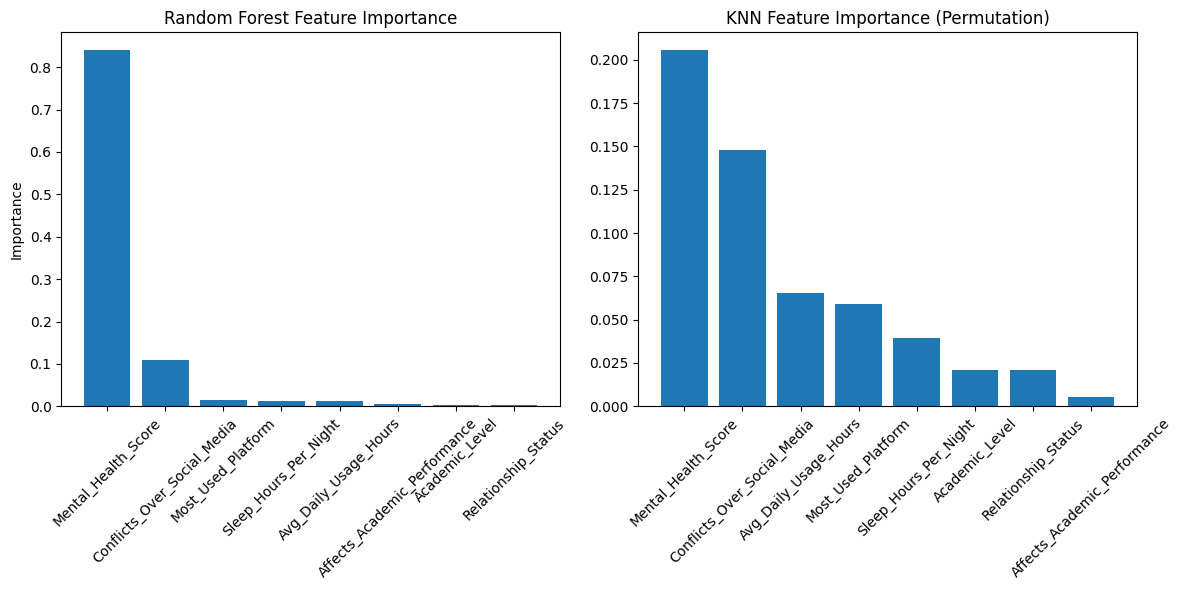

In [29]:
from sklearn.inspection import permutation_importance

features = X.columns

# Feature importance Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

print("Feature importance Random Forest:")
for idx in indices_rf:
    print(f"{features[idx]}: {importances_rf[idx]:.4f}")

# Permutation importance untuk KNN
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importances_knn = result.importances_mean
indices_knn = np.argsort(importances_knn)[::-1]

print("\nFeature importance KNN (Permutation Importance):")
for idx in indices_knn:
    print(f"{features[idx]}: {importances_knn[idx]:.4f}")

# Visualisasi perbandingan
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title('Random Forest Feature Importance')
plt.bar(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.xticks(range(len(indices_rf)), features[indices_rf], rotation=45)
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.title('KNN Feature Importance (Permutation)')
plt.bar(range(len(indices_knn)), importances_knn[indices_knn], align='center')
plt.xticks(range(len(indices_knn)), features[indices_knn], rotation=45)

plt.tight_layout()
plt.show()


**Random Forest Regressor**
- Mental_Health_Score (84.01%): Faktor dominan paling besar mempengaruhi prediksi skor kecanduan.

- Conflicts_Over_Social_Media (10.84%): Faktor penting kedua.

**KNN Regressor (Permutation Importance)**
- Mental_Health_Score (20.56%) dan Conflicts_Over_Social_Media (14.78%) juga dua fitur teratas.

- Fitur Avg_Daily_Usage_Hours dan Most_Used_Platform memiliki kontribusi lebih nyata dibanding RF.

**Kesimpulan** <br>
Kedua model sepakat Mental Health dan Konflik Sosmed adalah fitur utama yang sangat memengaruhi tingkat kecanduan. Perbedaan distribusi pentingnya fitur lain menunjukkan karakter berbeda dari model (RF lebih fokus fitur utama, KNN lebih menyebar).
